   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1   

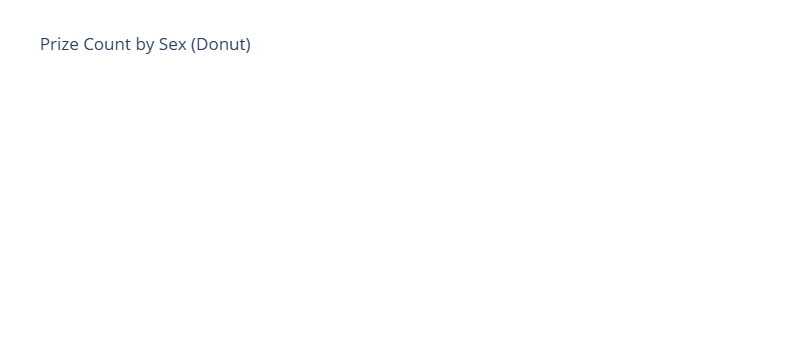

First 3 Female prize winners 
     year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

    birth_date birth_city                     birth_country  \
18  1867-11-07     Warsaw           Russian Empire (Poland)   
29  1843-06-09     Prague  Austrian Empi

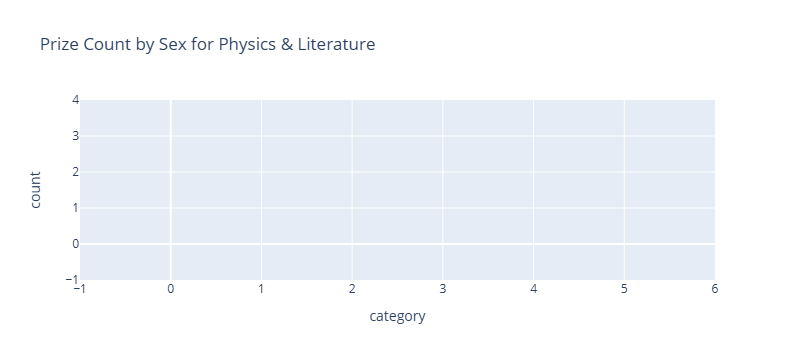

year                                                                  1969
category                                                         Economics
prize                    The Sveriges Riksbank Prize in Economic Scienc...
motivation               "for having developed and applied dynamic mode...
prize_share                                                            1/2
laureate_type                                                   Individual
full_name                                                    Jan Tinbergen
birth_date                                                      1903-04-12
birth_city                                                       the Hague
birth_country                                                  Netherlands
birth_country_current                                          Netherlands
sex                                                                   Male
organization_name                      The Netherlands School of Economics
organization_city        

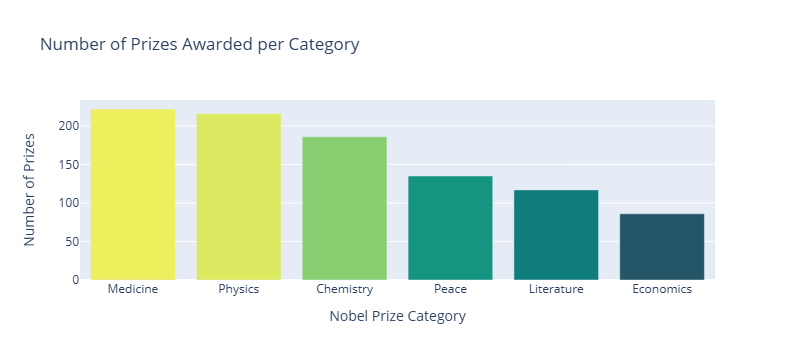

NameError: name 'moving_average' is not defined

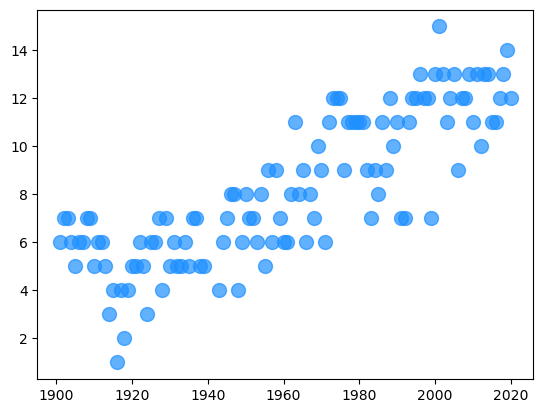

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


data = pd.read_csv("nobel_prize_data.csv")
print(data.head())
print(data.tail())
print(data.isna())
data.dropna()

data.describe()

men_prize = data.groupby("sex").count()
print(men_prize["prize"])

male_count = men_prize.get("Male",0)
female_count = men_prize.get("Female",0)


plot_df = pd.DataFrame({
    "Category": ["Female", "Male"],
    "Value": [female_count, male_count]
})

fig = px.pie(
    plot_df,
    names="Category",
    values="Value",
    hole=0.5,
    title="Prize Count by Sex (Donut)"
)

fig.show()

#Top 3 female

Top3female = data.sort_values




#First 3 female prize winners
male_rows = data[data["sex"] == "Male"]
female_rows = data[data["sex"] == "Female"]
print(f"First 3 Female prize winners \n {female_rows.head(3)}")

#Prize winners more than 2

morethan2 = data.groupby("full_name").count()
filtered = morethan2[morethan2["prize"]>1]
print(filtered)


#diffbetween category by sex

count_bycat = men_prize[men_prize["category"].isin(["Physics", "Literature"])]
print(count_bycat)

grouped = count_bycat.groupby(["sex","category"]).size().reset_index(name = "count")
print(grouped)

fig = px.bar(
    grouped,
    x="category",
    y="count",
    color="sex",
    barmode="group",
    title="Prize Count by Sex for Physics & Literature"
)
fig.show()

#first prize in economics

first_econ = data[data["category"] == "Economics"].sort_values(by="year").iloc[0]
print(first_econ)

#To find the number of unique categories in a column we can use:

data.category.nunique()
#To generate the vertical plotly bar chart, we again use .value_counts():
prizes_per_category = data.category.value_counts()
v_bar = px.bar(
        x = prizes_per_category.index,
        y = prizes_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')
 
v_bar.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
v_bar.show()

#Number of Prizes Awarded over Time. First, we have to count the number of Nobel prizes that are awarded each year.

prize_per_year = data.groupby("year").count().prize
plt.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)
 
ax.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

#The Prize Share of Laureates over Time

yearly_avg_share = data.groupby(by='year').agg({'share_pct': pd.Series.mean})
share_moving_average = yearly_avg_share.rolling(window=5).mean()

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

#plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)
 
ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
 
# Adding prize share plot on second axis
ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)
 
plt.show()

#Top 20 Ranking


Top20 = data.groupby("birth_country_current").sum()
Topval = Top20.sort_values(by="prize", ascending=False)
Top = Topval.groupby(["birth_country_current","prize"]).size().reset_index(name="count")
print(Top.head(20))

h_bar = px.bar(x=top.prize,
               y=top.birth_country_current,
               orientation='h',
               color=top.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()


#Displaying the Data on a Map

df_countries = data.groupby(['birth_country_current', 'ISO'], 
                               as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

#The category breakdown by country
cat_country = data.groupby(['birth_country_current', 'category'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_country.sort_values(by='prize', ascending=False, inplace=True)


merged_df = pd.merge(cat_country, top, on='birth_country_current')
# change column names
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)



cat_cntry_bar = px.bar(x=merged_df.cat_prize,
                       y=merged_df.birth_country_current,
                       color=merged_df.category,
                       orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
 
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', 
                            yaxis_title='Country')
cat_cntry_bar.show()


#Prize by org
prize_org = data.groupby(['organization_name'], 
                               as_index=False).agg({'prize': pd.Series.count})
print(prize_org.sort_values(ascending=True, inplace=True)

#prize winners from University of Chicago and Harvard University

print(prize_org[prize_org["organization_name"] == "University of Chicago"])
print(prize_org[prize_org["organization_name"] == "Harvard University"])

#Resarch Cities
top20_org_cities = data.organization_city.value_counts()[:20]
top20_org_cities.sort_values(ascending=True, inplace=True)
city_bar2 = px.bar(x = top20_org_cities.values,
                  y = top20_org_cities.index,
                  orientation='h',
                  color=top20_org_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Which Cities Do the Most Research?')
 
city_bar2.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City',
                       coloraxis_showscale=False)
city_bar2.show()


#Laureate Birth Cities

top20_cities = data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

# Ensure birth_date is in datetime format
data["birth_date"] = pd.to_datetime(data["birth_date"], errors="coerce")

# Extract year
birth_year = data["birth_date"].dt.year

data["winningage"] = data["year"] - birth_year
print(data)

#oldest and youngest winners


Youn = data.sort_values("winningage", ascending=True).head(2)
old = data.sort_values("winningage", ascending=False).head(2)



print("Youngest Winners:")
print(Youn)

print("\nOldest Winners:")
print(old)

#Averageage

avgage = data["winningage"].dropna().mean()
print("Average age")
print(avgage)

#descriptive

print(data["winningage"].describe())

#Age Differences between Categories
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=data,
                x='category',
                y='winning_age')
 
plt.show()

#Laureate Age over Time by Category

with sns.axes_style('whitegrid'):
    sns.lmplot(data=data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()





